In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib

In [6]:
df = pd.read_csv('sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight y Outlet_Size presentan valores vacíos

In [9]:
df.loc[df.isnull().any(axis=1)].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [10]:
df[['Item_Weight','Outlet_Size']].head()

,Item_Weight,Outlet_Size
0,9.30,Medium
1,5.92,Medium
2,17.50,Medium
3,19.20,NaN
4,8.93,High


In [11]:
df['Item_Weight'].fillna(method='bfill', inplace = True)

In [12]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Como Outlet_Size no es imputable, se procederá a eliminar las filas vacías

In [13]:
df.dropna(how = 'any', inplace=True)

In [14]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.826324,0.064505,141.256859,1995.794373,2322.688445
std,4.662000,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,8.710000,0.026681,94.012000,1987.000000,974.731200
50%,12.600000,0.052811,143.178600,1997.000000,1928.156800
75%,16.850000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
df.groupby(['Outlet_Size']).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Size,,,,,
High,13.006148,0.059957,141.425982,1987.000000,2298.995256
Medium,12.773749,0.060142,140.590514,1997.635875,2681.603542
Small,12.817634,0.071383,141.970209,1997.072864,1912.149161


In [17]:
df.groupby(['Outlet_Location_Type']).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Location_Type,,,,,
Tier 1,12.851943,0.071205,140.870106,1995.125628,1876.909159
Tier 2,12.829349,0.061263,143.122481,2004.000000,2438.841866
Tier 3,12.803429,0.059859,140.966534,1993.635420,2664.906068


In [18]:
df.groupby(['Outlet_Identifier']).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Identifier,,,,,
OUT013,13.006148,0.059957,141.425982,1987,2298.995256
OUT018,12.873346,0.061014,141.678634,2009,1995.498739
OUT019,12.710398,0.108441,139.787088,1985,340.329723
OUT027,12.531968,0.058615,139.801791,1985,3694.038558
OUT035,12.829349,0.061263,143.122481,2004,2438.841866
OUT046,12.866801,0.060464,142.057387,1997,2277.844267
OUT049,12.917446,0.060806,140.297699,1999,2348.354635


Gráficos

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [23]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [58]:
Tipo_Ventas  = df.groupby(['Item_Type']).sum()['Item_Outlet_Sales']
Tipo_Ventas

Item_Type
Baking Goods             956731.963
Breads                   430907.092
Breakfast                181978.453
Canned                  1084971.035
Dairy                   1166681.340
Frozen Foods            1391424.793
Fruits and Vegetables   2149593.225
Hard Drinks              342019.463
Health and Hygiene       802275.018
Household               1584960.869
Meat                     725555.550
Others                   244707.466
Seafood                  111960.262
Snack Foods             2107333.567
Soft Drinks              651067.178
Starchy Foods            266427.194
Name: Item_Outlet_Sales, dtype: float64

In [59]:
plt.style.use('ggplot')


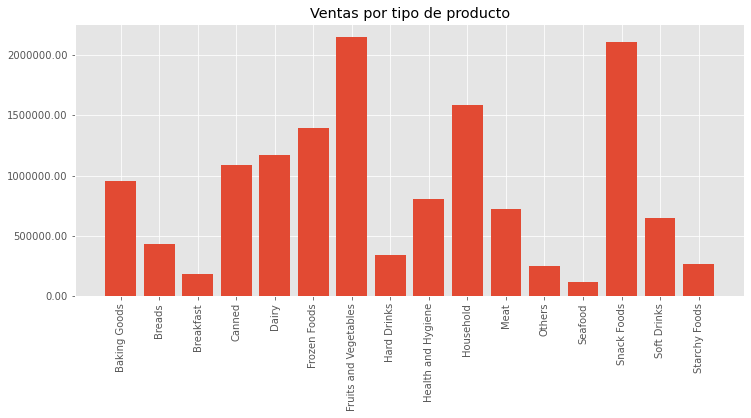

In [69]:
fig,ax = plt.subplots(figsize=(12,5))
plt.title('Ventas por tipo de producto')
ax.bar(Tipo_Ventas.index,Tipo_Ventas.values)
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))

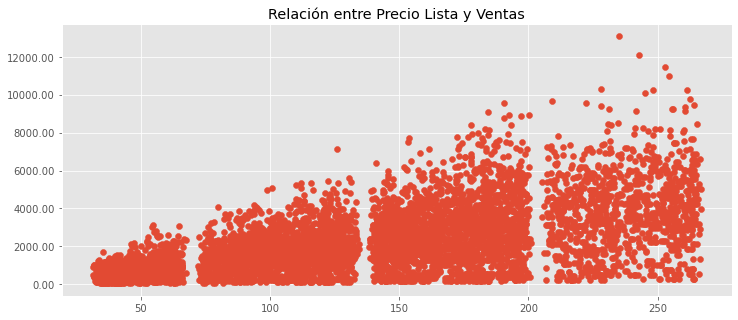

In [70]:
fig,ax = plt.subplots(figsize=(12,5))
plt.scatter(df['Item_MRP'], df['Item_Outlet_Sales'])
plt.title('Relación entre Precio Lista y Ventas')
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))

In [46]:
Tamaño_Ventas = df.groupby(['Outlet_Size']).mean()['Item_Outlet_Sales']
Tamaño_Ventas

Outlet_Size
High     2298.995
Medium   2681.604
Small    1912.149
Name: Item_Outlet_Sales, dtype: float64

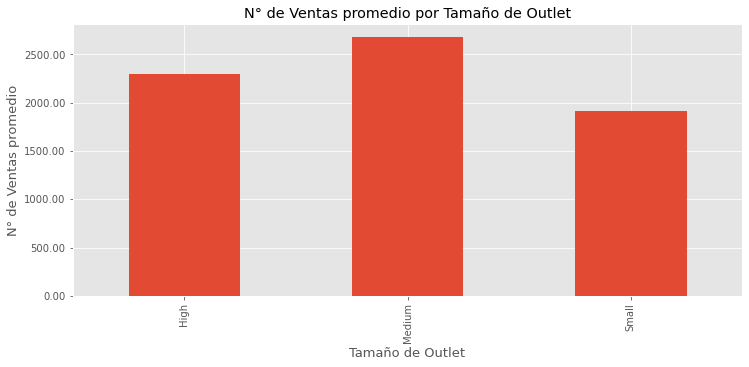

In [72]:
fig,ax = plt.subplots(figsize=(12,5))
Tamaño_Ventas.plot.bar()
plt.title('N° de Ventas promedio por Tamaño de Outlet')
plt.ylabel('N° de Ventas promedio', fontsize = 13)
plt.xlabel('Tamaño de Outlet', fontsize = 13)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))

In [51]:
Tipo_Ventas = df.groupby(['Outlet_Location_Type']).mean()[['Item_Outlet_Sales']]
Tipo_Ventas

,Item_Outlet_Sales
Outlet_Location_Type,
Tier 1,1876.909
Tier 2,2438.842
Tier 3,2664.906


Text(0.5, 0, 'Tipo de Outlet')

<Figure size 800x640 with 0 Axes>

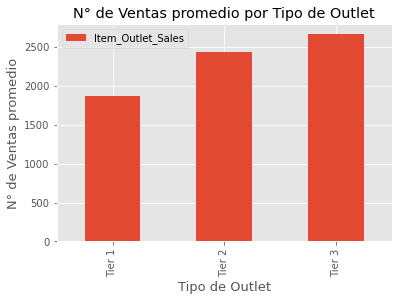

In [53]:
plt.figure(figsize=(10, 8), dpi=80)
Tipo_Ventas.plot.bar()
plt.title('N° de Ventas promedio por Tipo de Outlet')
plt.ylabel('N° de Ventas promedio', fontsize = 13)
plt.xlabel('Tipo de Outlet', fontsize = 13)

In [79]:
Fat_Ventas = df.groupby(['Item_Fat_Content']).sum()['Item_Outlet_Sales']
Fat_Ventas

Item_Fat_Content
LF         516696.087
Low Fat   8423134.338
Regular   4911128.556
low fat    176505.577
reg        171129.908
Name: Item_Outlet_Sales, dtype: float64

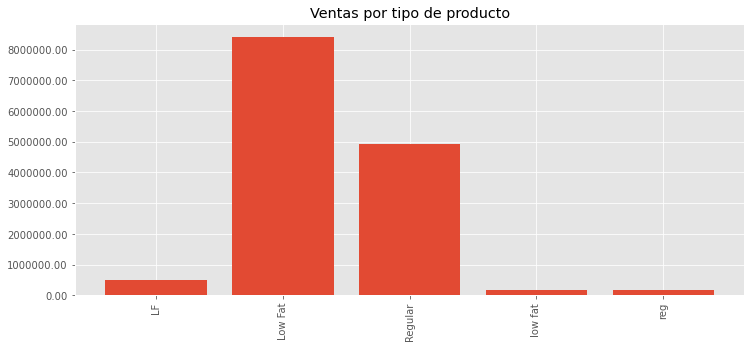

In [81]:
fig,ax = plt.subplots(figsize=(12,5))
plt.title('Ventas por tipo de producto')
ax.bar(Fat_Ventas.index, Fat_Ventas.values)
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))